In [16]:
#SVM - linear kernel

In [17]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
data = pd.read_csv("iris.data", header = None)
data = data.replace({'Iris-setosa': 0, 'Iris-versicolor': 1})
r = list(range(100,150))
data = data.drop(data.index[r])

In [19]:
X = np.array(data)
X = X[:,[2,3,4]]

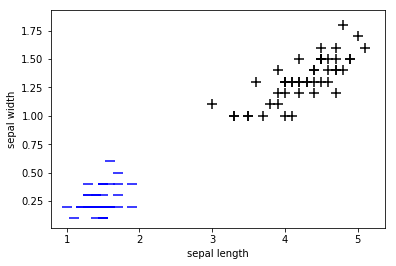

In [20]:
for i in range(len(X)):
    if X[i][-1] == 0:
        plt.scatter(X[i][0], X[i][1], s=120, marker='_', color = 'blue')
    else:
        plt.scatter(X[i][0], X[i][1], s=120, marker='+', color = 'black')
        
# Red line is how it will look like...
plt.xlabel("sepal length")
plt.ylabel("sepal width")

plt.show()

In [6]:
z = np.ones((len(X),1))
X = np.append(z, X, axis = 1)

(100, 4)

In [15]:
random.shuffle(X)
X_train = X[:90, :]
X_test = X[90: , : ]
Y_train = X[:90, -1]
Y_test = X[90:, -1]
X_test.shape
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [8]:
X_train = X_train[:,[0,1,2]]
X_test = X_test[:,[0,1,2]]
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(len(Y_test),1)
Y_train = Y_train.reshape(len(Y_train),1)
X_train.shape
#90 for training 10 for test

(90, 3)

In [9]:
def training_data(X_train, theta, Y_train, no_of_epochs, alpha):
    for epoch in range(1,no_of_epochs):
        h = np.dot(X_train, theta)
        product = h*Y_train
        i = 0
        for p in product:
            if p > 1:
                cost = 0;
                theta = theta - alpha*(2*theta*(1/no_of_epochs))
            else:
                cost = 1 - p
                L = (X_train[i,:]*Y_train[i])
                L = L.reshape(len(L),1)
                theta = theta + alpha * (L- (2*(1/no_of_epochs)*theta))
                theta = np.array(theta, np.float64)
            i = i + 1
    return cost,theta

In [10]:
def predict(X_test, theta) :
    y_pred = np.dot(X_test, theta)
    predictions = []
    y_pred.shape
    for val in y_pred:
        if(val > 1):
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [11]:
theta = np.zeros((len(X_train[0]),1))
no_of_epochs = 100
alpha = 0.001
cost, theta = training_data(X_train,theta, Y_train, no_of_epochs, alpha)
predictions = []
predictions = predict(X_test, theta)
print("Accuracy")
print(accuracy_score(Y_test,predictions))

Accuracy
1.0


In [12]:
confusion_matrix(predictions,Y_test)

array([[7, 0],
       [0, 3]], dtype=int64)

100


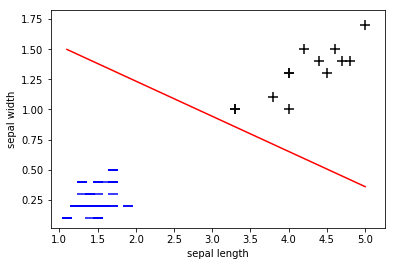

In [14]:
R = X[:,[0,1,2]]
h = np.dot(R,theta)
print(len(X))
for i in range(len(X)):
    if X[i][-1] == 0:
        plt.scatter(X[i][1], X[i][2], s=120, marker='_', color = 'blue')
    else:
        plt.scatter(X[i][1], X[i][2], s=120, marker='+', color = 'black')
h = h.tolist()
# Red line is how it will look like...
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.plot([max(X[:,1]), min(X[:,1])], [min(h), max(h)], color='red') # predicted
plt.show()